# 早上場

流程：

1. 安裝套件
2. 爬蟲必備技能:
    1. get
    2. post
    3. 載圖片
3. 實戰：
    1. Gomaji範例
    2. PTT航海王版範例
    3. Cookie觀念講解
    4. PTT 八卦版範例

## 安裝套件

請在cmd執行下列指令  
> **`pip install requests simplejson bs4`**

* requests：是可以讓python上網，與其他網站進行get、post等協定的套件
* simplejson：讓python能處理json的套件
* bs4：能夠解析網頁html的套件





# 必備技能
## Get
就像是寄明信片，把你要查詢的資訊都寫在外面  
沒有資安疑慮、重視速度會選用 **get**
 
ex：google查詢  
通常?後面的字串就是要查詢的東西  

![img](https://s3.amazonaws.com/media-p.slid.es/uploads/545711/images/2854314/9957A3BD-C870-4225-9273-F22555EC5049.jpg)

下面範例：爬取 [中興大學google搜尋結果](http://www.google.com.tw/search?q=中興大學&oq=中興大學&aqs=chrome..69i57j69i61l3j69i65l2.176j0j7&sourceid=chrome&ie=UTF-8) 的資料

In [3]:
import requests
# 裏面可以放任意的網址
re = requests.get("http://www.cs.nchu.edu.tw/v4/") 

# 取得網站正確的編碼避免出現亂碼
re.encoding = re.apparent_encoding
print(re.text)

<!DOCTYPE html>
<html>
<head>
    <title>國立中興大學資訊科學與工程學系</title>
    <meta name="description" content="Department of Computer Science and Engineering, NCHU 國立中興大學資訊科學與工程學系">
    <meta name="keywors" content="CSE,Computer Science,NCHU,資工系,中興資工,中興大學">
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <!-- Third party stylesheets -->
    <link type="text/css" rel=stylesheet href="lib/css/bootstrap.min.css">
    <link type="text/css" rel="stylesheet" href="lib/css/ionicons.min.css">
    <!-- Custom stylesheets -->
    <link type="image/ico" rel="icon" href="img/favicon.ico">
    <link type="text/css" rel="stylesheet" href="css/cse.css">
    <link type="text/css" rel="stylesheet" href="css/home.css">
    <link type="text/css" rel="stylesheet" href="css/intro.css">
    <link type="text/css" rel="stylesheet" href="css/news.css">
    <link

## Post
像提交的訊息放在信封裏面，除非偷看封包不然沒辦法知道你傳了什麼資訊  
有資安疑慮，例如登入系統等，請使用 **post**

![img](http://img.tulaoshi.com/image/20160217/00c80903e1d63b753d3f84bd0c1538a8.jpg)
下列範例: 爬取 [中興學校的課程查詢網](https://onepiece.nchu.edu.tw/cofsys/plsql/crseqry_home) 資工系的課程


## requests.post 裏面的data怎知要打什麼?

先按開F12再執行中興的課程查詢  
然後按到Network的地方  
下面選單選項選擇第一個：crseqry_home  
拉到最下面看到的Form Data  
把Form Data的資料轉換成dict的型態  
此資料即是requests.post裏面的data
> {
>   'v_career' : 'U'
>    ...
> }


In [7]:
import requests
re = requests.post("https://onepiece.nchu.edu.tw/cofsys/plsql/crseqry_home",
data={'v_career':'U','v_dept':'U56','v_level':'2'})
# data這個參數裏面放的是我們提交表單的參數
# U代表是大學部
# U56是資工系代號
# 2代表是二年級

print(re.text) 
# 這樣就可以看到該網頁的html

<HTML>
<style type="text/css" media=print> .noprint{display : none } </style>
<HEAD>

  <!-- Google Tag Manager -->
  <noscript><iframe src="//www.googletagmanager.com/ns.html?id=GTM-PPB9ZW"
  height="0" width="0" style="display:none;visibility:hidden"></iframe></noscript>
  <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  '//www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
  })(window,document,'script','dataLayer','GTM-PPB9ZW');</script>
  <!-- End Google Tag Manager -->
  
</HEAD>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<title>課程查詢系統 | 國立中興大學</title>
<style type="text/css">
body {
  //margin: au

# 必備技能2
## 下載圖片
範例網站:
[gomaji](http://www.gomaji.com/index.php?city=Taichung&tag_id=101)  


下載圖片範例：

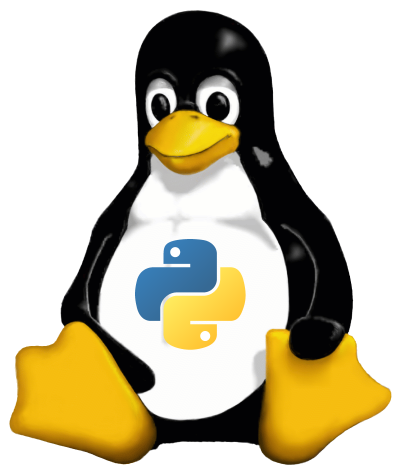

In [12]:
import shutil

# stream=True，用串流的方式下載
img = requests.get('http://www.pixelbeat.org/talks/linux_and_python/tux-python.png', stream=True)

# with是python開關檔案的語法
# 因為要存圖片所以要用2進制的方式
# img是request的物件，raw會用2進制顯示結果
with open('xxx.jpg', 'wb') as f:
    shutil.copyfileobj(img.raw, f)

print(img.raw)

# 這2行是jupyter的指令，所以才能顯示圖片！！！ 你在cmd打是沒用的
from IPython.display import Image 
Image(filename='xxx.jpg')

### 包成函式來呼叫吧

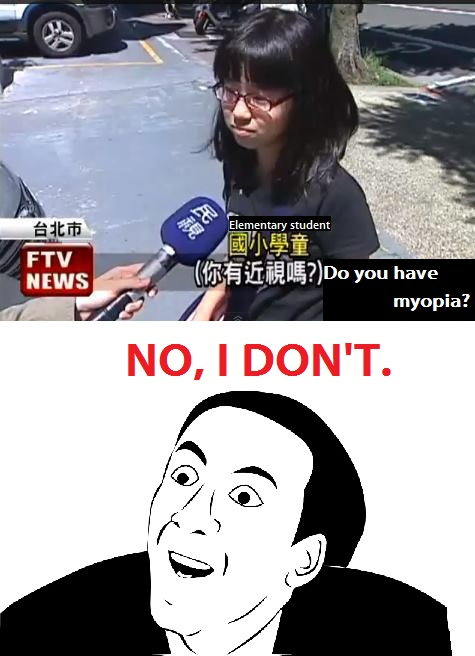

In [13]:
import requests, shutil

def savePict(url, name):
    img = requests.get(url,stream=True)
    with open(name+'.jpg', 'wb') as f:
        shutil.copyfileobj(img.raw, f)
savePict("http://i2.disp.cc/imgur7/146Qf.jpg", "檔名")

from IPython.display import Image 
Image(filename='檔名.jpg')

## 範例：把餐廳跟餐點爬下來
範例網站：[gomaji](http://www.gomaji.com/index.php?city=Taichung&tag_id=28)

把要抓的網頁內容丟進beautifulSoup建構式裡面  
res.text就是顯示網頁的內容  

In [17]:
import requests
from bs4 import BeautifulSoup
res = requests.get('http://www.gomaji.com/index.php?city=Taichung&tag_id=28')
soup = BeautifulSoup(res.text, 'lxml')

# select用法
# 指定css選取器的語法
# select 回傳list 也就是array
# soup.select('ul or h1 or img or a ...各式各樣的css選取器的語法'):
soup.select('.proname_3')

[<h3 class="proname_3">A.水Q手提禮盒一盒 / B.熊愛你禮盒一盒</h3>,
 <h3 class="proname_3">2017戀人限定蛋糕</h3>,
 <h3 class="proname_3">平假日皆可抵用1000元消費金額</h3>,
 <h3 class="proname_3">A.原味鳳梨酥禮盒一盒 / B.巧克力鳳梨酥禮盒一盒 / C.繽紛葛蕾特禮盒一盒 / D.璀璨奶油卷禮盒一盒</h3>,
 <h3 class="proname_3">A.月之曉夢中秋禮盒一盒 / B.月之曉夢中秋禮盒三盒 / C.月之曉夢中秋禮盒十盒 / D.月之晶瑩A中秋禮盒一盒...</h3>,
 <h3 class="proname_3">A.綜合鳳黃酥(九入)一盒 / B.綜合鳳黃酥(九入)三盒 / C.綜合鳳黃酥(九入)十盒 / D.正隆之月一盒 /...</h3>,
 <h3 class="proname_3">御品奶皇月餅禮盒一盒+原木桶豆花券一張</h3>,
 <h3 class="proname_3">A.巧克力天使蛋糕一入 / B.白雪黑森林蛋糕捲一入 / C.皇家牛奶米千層蛋糕一入</h3>,
 <h3 class="proname_3">夏季新品覓蜜蜂蜜蛋糕 A.單盒組 / B.三盒組 / C.六盒組</h3>,
 <h3 class="proname_3">2017限定-帥氣papa節限定蛋糕 A.6吋蛋糕五選一 / B.8吋蛋糕五選一 / C.8吋蛋糕棋藝papa一個 ...</h3>,
 <h3 class="proname_3">小樽燒伴手禮</h3>,
 <h3 class="proname_3">黑羽土雞精煉萃取大容量原味滴雞精禮盒一盒(150ml x 10包)</h3>,
 <h3 class="proname_3">平假日皆可抵用600元消費金額</h3>]

什麼是css選取器  
網頁裏面有太多元件  
需要一種語法讓我們可以定位到那些元件  
對那些東西進行操作  
[參考網址](http://www.j4.com.tw/web-design/css-%E9%81%B8%E6%93%87%E5%99%A8%E3%80%81%E9%81%B8%E5%8F%96%E5%99%A8%EF%BC%88selector%EF%BC%89%E7%A8%AE%E9%A1%9E%E7%B0%A1%E4%BB%8B/)

學css選取器有點麻煩  
所以這堂課不會介紹  
直接使用工具來輔助我們
![img](http://i.imgur.com/VnjnW7S.jpg)

## 安裝Chrome插件 infolite  

[下載網址](https://chrome.google.com/webstore/detail/infolite/ipjbadabbpedegielkhgpiekdlmfpgal)  

[使用說明](http://tech-marsw.logdown.com/blog/2016/01/10/crawler-tips-mining-chrome)

示範 滑鼠移過去就會顯示CSS選取器  
直接將css選取器的值  
複製貼上到**soup.select()**當中
![示範](http://user-image.logdown.io/user/411/blog/411/post/419937/ydTt52rqQiOtBhtpqUYX_%E8%9E%A2%E5%B9%95%E5%BF%AB%E7%85%A7%202016-01-10%20%E4%B8%8B%E5%8D%8812.53.48.png)

範例：顯示Gomaji商品名稱

In [21]:
import requests
from bs4 import BeautifulSoup
def parsePage(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'lxml')

    for i in soup.select('.proname_3'):
        print(i.text + '\n')
        
parsePage('http://www.gomaji.com/index.php?city=Taichung&tag_id=28')

A.水Q手提禮盒一盒 / B.熊愛你禮盒一盒

2017戀人限定蛋糕

平假日皆可抵用1000元消費金額

A.原味鳳梨酥禮盒一盒 / B.巧克力鳳梨酥禮盒一盒 / C.繽紛葛蕾特禮盒一盒 / D.璀璨奶油卷禮盒一盒

A.月之曉夢中秋禮盒一盒 / B.月之曉夢中秋禮盒三盒 / C.月之曉夢中秋禮盒十盒 / D.月之晶瑩A中秋禮盒一盒...

A.綜合鳳黃酥(九入)一盒 / B.綜合鳳黃酥(九入)三盒 / C.綜合鳳黃酥(九入)十盒 / D.正隆之月一盒 /...

御品奶皇月餅禮盒一盒+原木桶豆花券一張

A.巧克力天使蛋糕一入 / B.白雪黑森林蛋糕捲一入 / C.皇家牛奶米千層蛋糕一入

夏季新品覓蜜蜂蜜蛋糕 A.單盒組 / B.三盒組 / C.六盒組

2017限定-帥氣papa節限定蛋糕 A.6吋蛋糕五選一 / B.8吋蛋糕五選一 / C.8吋蛋糕棋藝papa一個 ...

小樽燒伴手禮

黑羽土雞精煉萃取大容量原味滴雞精禮盒一盒(150ml x 10包)

平假日皆可抵用600元消費金額



把爬蟲的結果存成json  
需要用到json這個函式庫

In [18]:
import requests, json
from bs4 import BeautifulSoup

res = requests.get('http://www.gomaji.com/index.php?city=Taichung&tag_id=28')
soup = BeautifulSoup(res.text, 'lxml')

tmp = []
for i in soup.select('.proname_3'):
    tmp.append({'product':i.text})

json.dump(tmp, open('demo.json', 'w'))

# 顯示一下抓下來的json檔
with open('demo.json', 'r', encoding='UTF-8') as f:
    print(json.load(f))

[{'product': '黑羽土雞精煉萃取大容量原味滴雞精禮盒一盒(150ml x 10包)'}, {'product': 'A.水Q手提禮盒一盒 / B.熊愛你禮盒一盒'}, {'product': '2017戀人限定蛋糕'}, {'product': '平假日皆可抵用1000元消費金額'}, {'product': 'A.原味鳳梨酥禮盒一盒 / B.巧克力鳳梨酥禮盒一盒 / C.繽紛葛蕾特禮盒一盒 / D.璀璨奶油卷禮盒一盒'}, {'product': 'A.月之曉夢中秋禮盒一盒 / B.月之曉夢中秋禮盒三盒 / C.月之曉夢中秋禮盒十盒 / D.月之晶瑩A中秋禮盒一盒...'}, {'product': 'A.綜合鳳黃酥(九入)一盒 / B.綜合鳳黃酥(九入)三盒 / C.綜合鳳黃酥(九入)十盒 / D.正隆之月一盒 /...'}, {'product': '御品奶皇月餅禮盒一盒+原木桶豆花券一張'}, {'product': 'A.巧克力天使蛋糕一入 / B.白雪黑森林蛋糕捲一入 / C.皇家牛奶米千層蛋糕一入'}, {'product': '夏季新品覓蜜蜂蜜蛋糕 A.單盒組 / B.三盒組 / C.六盒組'}, {'product': '2017限定-帥氣papa節限定蛋糕 A.6吋蛋糕五選一 / B.8吋蛋糕五選一 / C.8吋蛋糕棋藝papa一個 ...'}, {'product': '小樽燒伴手禮'}, {'product': '黑羽土雞精煉萃取大容量原味滴雞精禮盒一盒(150ml x 10包)'}, {'product': '平假日皆可抵用600元消費金額'}]


## PTT爬蟲實戰

爬航海王版從1300~1304頁  
結合進度條，顯示完成進度 

In [35]:
import requests, json, pyprind
from bs4 import BeautifulSoup

for i in pyprind.prog_bar(range(1290, 1305-1), track_time=False):
    res = requests.get('https://www.ptt.cc/bbs/ONE_PIECE/index{}.html'.format(i))
    soup = BeautifulSoup(res.text, 'lxml')
    #print(soup.select('.title a'))
    

0%          100%
[##############]


儲存成json格式：

In [39]:
import requests, json, pyprind
from bs4 import BeautifulSoup

data = []
for i in pyprind.prog_bar(range(1290, 1305-1), track_time=False):
    res = requests.get('https://www.ptt.cc/bbs/ONE_PIECE/index{}.html'.format(i))
    soup = BeautifulSoup(res.text, 'lxml')
    
    for j in soup.select('.title a'):
        data.append({'title':j.text, 'url':'https://www.ptt.cc' + j['href']})

print(data)

0%          100%
[##############]

[{'title': 'Re: [心得] 魯夫本體的強度', 'url': 'https://www.ptt.cc/bbs/ONE_PIECE/M.1499427193.A.2D1.html'}, {'title': 'Re: [分享] 舊聞 歌舞伎 in One Piece', 'url': 'https://www.ptt.cc/bbs/ONE_PIECE/M.1499427722.A.2D4.html'}, {'title': '[閒聊] 霸王色霸氣到底多不多啊', 'url': 'https://www.ptt.cc/bbs/ONE_PIECE/M.1499429120.A.3ED.html'}, {'title': '[心得] 871 大媽', 'url': 'https://www.ptt.cc/bbs/ONE_PIECE/M.1499429908.A.CAD.html'}, {'title': '[閒聊] CP0', 'url': 'https://www.ptt.cc/bbs/ONE_PIECE/M.1499433327.A.F16.html'}, {'title': '[情報] ccg 2017 one piece 公仔', 'url': 'https://www.ptt.cc/bbs/ONE_PIECE/M.1499438378.A.CD0.html'}, {'title': '[閒聊] 大媽是世上最強的女人！', 'url': 'https://www.ptt.cc/bbs/ONE_PIECE/M.1499441922.A.A23.html'}, {'title': '[心得] 之後劇情走向推測', 'url': 'https://www.ptt.cc/bbs/ONE_PIECE/M.1499453510.A.65A.html'}, {'title': '[閒聊] 漫畫名字的翻譯有點無法接受', 'url': 'https://www.ptt.cc/bbs/ONE_PIECE/M.1499478011.A.8A2.html'}, {'title': '[閒聊] 為何大媽、百獸凱多、黑鬍子底下成員這麼強', 'url': 'https://www.ptt.cc/bbs/ONE_PIECE/M.1499489402.A.95D.html'}, {'

# 今天的目標：PTT八卦版的情緒分類器

所以當然要用爬蟲去爬八卦版  
航海王版跟八卦版有什麼不一樣嘛?

In [5]:
res = requests.get('https://www.ptt.cc/bbs/Gossiping/index.html')
print(res.text)

<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>批踢踢實業坊</title>

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-base.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-custom.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/pushstream.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-print.css" media="print">




	</head>
    <body>
		
<div class="bbs-screen bbs-content">
    <div class="over18-notice">
        <p>本網站已依網站內容分級規定處理</p>

        <p>警告︰您即將進入之看板內容需滿十八歲方可瀏覽。</p>

        <p>若您尚未年滿十八歲，請點選離開。若您已滿十八歲，亦不可將本區之內容派發、傳閱、出售、出租、交給或借予年齡未滿18歲的人士瀏覽，或將本網站內容向該人士出示、播放或放映。</p>
    </div>
</div>

<div class="bbs-screen bbs-content center clear">
    <form action="/ask/over18"

![img](http://pic.pimg.tw/bshadow/1429897640-4241887945_n.png?v=1429897644)

要跟電腦說我們已經滿十八歲了  
請在request上面加個cookie  

### cookie???

![img](https://blueprintinteractive.com/sites/default/files/images/cookie-monster.jpg)

早餐的大媽，可以輕鬆記住客人的臉
![img](http://static.ettoday.net/images/90/d90723.jpg)

但是客人比較多的店會記不住，所以需要發個號碼牌
![img](http://img.appledaily.com.tw/images/ReNews/20150105/640_12a6eb4b9763decad4004123c467e7a8.jpg)

### 網頁也是如此
網頁如果需要知道他是在跟誰通訊  
為了記住他的客戶 就會需要發號碼牌  
號碼牌就是**cookie**

![img](http://odf594a9x.bkt.clouddn.com/cookie-session-0.png)

> 程式碼這樣寫即可
> res = requests.get('https://www.ptt.cc/bbs/Gossiping/index.html', cookies={'over18': '1'})

In [11]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.ptt.cc/bbs/Gossiping/index.html', cookies={'over18': '1'})
soup = BeautifulSoup(res.text, 'lxml')
data = []
for j in soup.select('.title a'):
    
    data.append({'title':j.text, 'url':'https://www.ptt.cc' + j['href']})

print(data)

[{'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025344.A.F1C.html', 'title': 'Re: [新聞] 陳金德拒辭 稱要改造中油'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025393.A.06D.html', 'title': 'Re: [新聞] 徐國勇：15%備轉容量是誤解法令'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025434.A.DCC.html', 'title': 'Re: [新聞] 總統府憲兵遭持刀攻擊 濺血送醫'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025442.A.499.html', 'title': '[新聞] 基本工資勞方喊27K 資方：大學畢業生都沒'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025454.A.F33.html', 'title': '[新聞] 中油調查小組查什麼？ 高層：這實在太巧'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025468.A.7C9.html', 'title': '[新聞] 中油 下月不再和巨路續約'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025485.A.147.html', 'title': '[爆卦] 世大運首戰中華隊4比17敗給南韓'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025497.A.F32.html', 'title': '[問卦] 為何各國政府能容忍黑道的存在？'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025509.A.737.html', 'title': 'Re: [新聞] 跳電成擁核助力？苗博雅：誰敢保證核能絕'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025513.

In [15]:
import requests, json
from bs4 import BeautifulSoup
res = requests.get('https://www.ptt.cc/bbs/Gossiping/index.html', cookies={'over18': '1'})
soup = BeautifulSoup(res.text, 'lxml')
data = []
for j in soup.select('.title a'):
    res = requests.get('https://www.ptt.cc' + j['href'], cookies={'over18': '1'})
    soup = BeautifulSoup(res.text, 'lxml')
    print(soup.select('#main-content')[0].text)
    
    data.append({'title':j.text, 'url':'https://www.ptt.cc' + j['href'], 'text':soup.select('#main-content')[0].text})

json.dump(data, open('ptt.json', 'w'))

作者takuminauki (支持雙貿)看板Gossiping標題[問卦] 查容蘇因跟多賢怎麼分??時間Fri Aug 18 11:10:16 2017
最近很紅的模範生女主角
查容蘇因
跟多賢有87分像

在路上看到這樣的臉
到底該如何分辨呢?
無法分辨要簽名很尷尬阿

http://tinyurl.com/ya5re6gy
http://cdn2.ettoday.net/images/2723/e2723058.jpg
http://tinyurl.com/ya99nfmn
http://tinyurl.com/yd6zqv6b
http://tinyurl.com/y8asmzeb
http://cfile3.uf.tistory.com/image/2339B73D581DEA791201BD
http://tinyurl.com/y7xf2kjg

--
※ 發信站: 批踢踢實業坊(ptt.cc), 來自: 36.234.142.86
※ 文章網址: https://www.ptt.cc/bbs/Gossiping/M.1503025820.A.2E4.html

作者jiern (jiern)看板Gossiping標題Re: [情報] 華碩數百人減薪、調單位 員工：被打入冷時間Fri Aug 18 11:10:19 2017
華碩問題不只是客服
手機內建的APP就是一大問題
像ZF2其中一支ZD551kl
ZD551kl規格 RAM 3G/ROM 16G

手機初廠重置 一開機什麼都沒裝
單單所有內建APP+系統
佔ROM約12G左右 只剩一點點給使用者用
拖慢整個手機速度
一般手機使用者還不會覺得爛？

別家公司是幾乎沒有自制APP
把錢用來打廣告
這家公司除了有錢打廣告外
錢多到寫一堆垃圾APP
然後把垃圾app內建在手機
造就手機變垃圾


華碩另一個大問題是產品類分支太多
光手機產品別就分成
Zenfone
ZenFone Deluxe
ZenFone ZOOM
ZenFone Selfie
ZenFone Laser
ZenFone Go
ZenFone Ultra
ZenFone Live

有的下面還會再細分
像Zenfone還分
ZE552kl ZE520kl......等

ZenFone Deluxe分
ZS570kl及ZS550kl

作者snowice701 (等待來年的櫻花雨)看板Gossiping標題[新聞] 影／憲兵頸部遭砍傷濺血 總統府稱呂姓暴時間Fri Aug 18 11:14:36 2017
影／憲兵頸部遭砍傷濺血 總統府稱呂姓暴徒已送警訊

聯合影音

新聞連結：https://video.udn.com/news/738643

現場影片：https://www.facebook.com/udntv/videos/1593657384023926/

針對總統府員工家庭日，發生憲兵頸部遭砍傷濺血事件，總統府剛剛表示，遭暴徒所傷的
周姓憲兵，送急診後傷勢穩定；施暴的呂姓男子已送介壽路派出所問訊中。
　
總統府表示，今天稍早約10點15分在總統府南苑車道口（近博愛路）有一名呂姓男子闖入
，經執勤憲兵衛哨依標準程序警示制止不從，隨後迅速為第一線協勤衛哨官兵制伏，順利
阻止其進入府內，過程中周姓憲兵遭暴徒以隨身刀械所傷，已送台大醫院急診，傷勢穩定
，目前進行清創與傷口縫合。
　
總統府表示，該名暴徒目前已送介壽路派出所問訊當中。

--
※ 發信站: 批踢踢實業坊(ptt.cc), 來自: 60.250.135.18
※ 文章網址: https://www.ptt.cc/bbs/Gossiping/M.1503026080.A.E91.html

作者evan1004 (しょくもっれんさ)看板Gossiping標題[問卦] 看老電影會重複看嗎時間Fri Aug 18 11:14:56 2017

我是看過一次的電影 就不會看第二次
頂多重看一小片段 因後面都知道演什麼了

但是我朋友就很堅持 說 大部分人 都會一直
重看經典老電影  他還提到周星馳的功夫
大家至少重複看三次以上 我是無法理解

最後他說:
不然你問你家人堂伯虎點秋香和九品芝麻官看過幾次

所以來請教各位鄉民
一部電影 大家會重複看幾次?

-----
Sent from JPTT on my Xiaomi MI 6.

--
※ 發信站: 批踢踢實業坊(ptt.cc), 來自: 61.220.204.205
※ 文章網址: https://www.ptt.cc/bbs/Gossiping/M.1503026100.A.4CE.html

作者member7023 ()看板Gossiping標題Re: [問卦] 台灣的憲兵

作者Mews看板Gossiping標題[公告] Gossiping 板 開始舉辦樂透!時間Tue Aug 15 23:47:11 2017
世大運奪金數量
請到 Gossiping 板 按'f'參與樂透!

樂透說明

8/19世大運在台北舉行

來猜猜看這次台灣代表隊(也就是中華台北)

能拿下幾面金牌

1.卡在銀牌：金牌數量＝０面
2.正常發揮：金牌數量不超過７面
3.主場優勢：金牌數量＞７面
4.缺乏愛心:世大運期間台北市發生停電情形超過一小時，即開此項

４＞３＝２＝１

備註:統計數量以最後一項賽事頒布完獎項為準
                                         
一張 100 Ptt幣 (平民級)
樂透結束時間: 08/19/2017 01:00:41 Sat
→ abian: ya 08/15 23:47
→ snsdakb48: 菜逼巴 發錢 08/15 23:47
→ BILLYTHEKID: 又開 08/15 23:47
→ whiteadam: 幹 你要po幾次 08/15 23:47
噓 chocoball: 放羊的孩子 08/15 23:47
→ InnGee: 好菜 08/15 23:47
噓 match123: 錢啦 08/15 23:47
→ neetcat: 一定是假的 08/15 23:47
→ james732: 幹是要玩幾次 08/15 23:47
噓 ted01234567: 錢啊 08/15 23:47
→ nuggets: 發錢 08/15 23:47
→ whiteadam: 不會用 就下台 。滾 08/15 23:47
→ wyvernlee: 手動置底不用水桶嗎 ? 08/15 23:47
→ Mews: 設定完了啦 08/15 23:48
→ qw530817: 發錢 心裡創傷 08/15 23:48
※ 編輯: Mews (115.43.25.139), 08/15/2017 23:48:14
→ chara117yun: ？？？這次可以真的買了ㄇ！ 08/15 23:48
噓 hkr91511208: 我還以為是賭啥停電 08/15 23:48
→ bndan: 快下阿 !!! 等著撈 XD 08/15 23:48
→ Mews: 可以了啦 08/15 23:48
噓 jj1

## 休息一下


## 下午場開始

目錄：

1. 斷詞
    * 安裝結巴
    * 斷詞原理簡單講
    * 下載字典
2. 貝氏分類器
    * 原理
    * 卡方
    * 情緒字典
3. 實作


### 安裝結巴

> pip install jieba



### 斷詞原理簡單講

首先，知道詞跟詞出現在上下文的機率  
透過viterbi等演算法實現HMM模型  
找出機率最高的斷詞組合  

![img](jieba_procedure.png)

![img](https://upload.wikimedia.org/wikipedia/commons/7/73/Viterbi_animated_demo.gif)

斷詞，需要知道每個字：
1. S(獨立成詞)、B（詞的開頭）、M（中間）、E（結尾）四種詞的狀態的機率

如此就能算出機率最大的斷詞組合

![img](viterbi.png)
圖片引用自 [中文斷詞：斷句不要悲劇](http://s.itho.me/techtalk/2017/%E4%B8%AD%E6%96%87%E6%96%B7%E8%A9%9E%EF%BC%9A%E6%96%B7%E5%8F%A5%E4%B8%8D%E8%A6%81%E6%82%B2%E5%8A%87.pdf)

### 以下用WIKI百科上的viterbi做示範（參考即可）

[wiki -viterbi](https://zh.wikipedia.org/wiki/%E7%BB%B4%E7%89%B9%E6%AF%94%E7%AE%97%E6%B3%95)

使用viterbi時  
需要先知道上一個狀態變化到下一個狀態的機率  
以及每個狀態的發生機率是多少  
wiki是以醫生看病當例子

In [1]:
states = ('Healthy', 'Fever')
 
observations = ('normal', 'cold', 'dizzy')
 
start_probability = {'Healthy': 0.6, 'Fever': 0.4}
 
transition_probability = {
   'Healthy' : {'Healthy': 0.7, 'Fever': 0.3},
   'Fever' : {'Healthy': 0.4, 'Fever': 0.6},
   }
 
emission_probability = {
   'Healthy' : {'normal': 0.5, 'cold': 0.4, 'dizzy': 0.1},
   'Fever' : {'normal': 0.1, 'cold': 0.3, 'dizzy': 0.6},
   }

In [9]:
# Helps visualize the steps of Viterbi.
def print_dptable(V):
    print("    ")
    for i in range(len(V)):
        print("%8d" % i, end='')
    print()

    for y in V[0].keys():
        print("%.5s: " % y, end="")
        for t in range(len(V)):
            print("%.7s" % ("%f" % V[t][y]), end=" ")
        print()

def viterbi(obs, states, start_p, trans_p, emit_p):
    Pro = [{}]
    path = {}

    for s in states:
        Pro[0][s] = start_p[s] * emit_p[s][obs[0]]
        path[s] = [s]

    for index in range(1, len(obs)):
        Pro.append({})
        newPath = {}
        for newstate in states:
            prob, state = max([ (Pro[index-1][oldState] * trans_p[oldState][newstate] * emit_p[newstate][obs[index]], oldState) for oldState in states])

            Pro[index][newstate] = prob
            newPath[newstate] = path[state] + [newstate]
        path = newPath

    print_dptable(Pro)
    prob, state = max([(value, key) for key, value in Pro[-1].items()])
    return prob, path[state]

def example():
    return viterbi(observations,
                   states,
                   start_probability,
                   transition_probability,
                   emission_probability)
print(example())

    
       0       1       2
Healt: 0.30000 0.08400 0.00588 
Fever: 0.04000 0.02700 0.01512 
(0.01512, ['Healthy', 'Healthy', 'Fever'])


### 斷詞示範

In [1]:
import jieba, os
print(jieba.lcut('吉林市長春藥店'))


Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.313 seconds.
Prefix dict has been built succesfully.


['吉林市', '長', '春藥店']


### 下載字典 

答案不是 ~~春藥店~~  
是**長春** **藥店**  
但是蒐集到的單字不夠多  
導致演算法覺得這種組合的機率很小  

要改善就需要額外的字典

In [2]:
jieba.load_userdict(os.path.join('', 'dictionary', 'dict.txt.big.txt'))
jieba.load_userdict(os.path.join('', "dictionary", "NameDict_Ch_v2"))
print(jieba.lcut('吉林市長春藥店'))

['吉林市', '長春', '藥店']


### 貝氏分類器

#### 理論

貝氏定理就是我們熟知的條件機率  

首先呢：
![img](貝氏1.png)

倒過來也一樣
![img](貝氏2.png)

所以兩式個關係是這樣：
![img](貝氏3.png)

這個關係式，可以用於分類上面  
該公式解釋成白話文，意思是：
1. 如果有出現這些字，讓他屬於某一類別的機率 == （該類別底下，有出現這些字的機率）* 該類別出現的機率 / 出現這些字的機率
![img](貝氏4.png)

### 問題是...

<mark style='color:red'>該類別底下，有出現這些字的機率</mark>  
e.q. 請計算負面句子當中，同時出現好棒棒、廠廠、三寶、酸民的機率  
若訓練資料裏面，沒有同時出現 <mark style='color:red'>好棒棒、廠廠、三寶、酸民</mark>的句子  
那他屬於負面句子的機率是0  
正面的句子也是0（我不相信正面句子會講什麼三寶）  
最後判斷會淪為猜測（導致準確度趨近0.5）  

![img](naiveB.png)
![img](naiveB1.png)

所以如果我們拿掉 <mark style='color:red'>同時出現</mark>這個constraint呢？</mark>  
假設這些字出現的機率為獨立事件  
則我們可以將公式改寫成
![img](naiveB2.png)
![img](naiveB3.png)

這就是今天所使用的 NaiveBayes 

In [1]:
import itertools, pickle, json, sys
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.probability import FreqDist, ConditionalFreqDist

def create_Mainfeatures(pos_data, neg_data, BestFeatureVec):
    posWords = list(itertools.chain(*pos_data)) #把多為數組解煉成一維數組
    negWords = list(itertools.chain(*neg_data)) #同理

    # bigram
    bigram_finder = BigramCollocationFinder.from_words(posWords)
    posBigrams = bigram_finder.nbest(BigramAssocMeasures.chi_sq, 5000)
    bigram_finder = BigramCollocationFinder.from_words(negWords)
    negBigrams = bigram_finder.nbest(BigramAssocMeasures.chi_sq, 5000)
    posWords += posBigrams #詞和雙詞搭配
    negWords += negBigrams

    word_fd = FreqDist() #可統計所有詞的詞頻
    cond_word_fd = ConditionalFreqDist() #可統計積極文本中的詞頻和消極文本中的詞頻
    for word in posWords:
        word_fd[word] += 1
        cond_word_fd['pos'][word] += 1
    for word in negWords:
        word_fd[word] += 1
        cond_word_fd['neg'][word] += 1

    pos_word_count = cond_word_fd['pos'].N() #積極詞的數量
    neg_word_count = cond_word_fd['neg'].N() #消極詞的數量
    total_word_count = pos_word_count + neg_word_count

    word_features = {}
    for word, freq in word_fd.items():
        pos_score = BigramAssocMeasures.chi_sq(cond_word_fd['pos'][word], (freq, pos_word_count), total_word_count) #計算積極詞的卡方統計量，這裏也可以計算互信息等其它統計量
        neg_score = BigramAssocMeasures.chi_sq(cond_word_fd['neg'][word], (freq, neg_word_count), total_word_count) #同理
        word_features[word] = pos_score + neg_score

    def find_best_words(number):
        best = sorted(word_features.items(), key=lambda x: -x[1])[:number] # 把詞按信息量倒序排序。number 是特徵的微度，式可以不斷調整至最優的
        return set(w for w, s in best)

    best = find_best_words(BestFeatureVec)
    pickle.dump(best, open('bestMainFeatures.pickle.{}'.format(BestFeatureVec), 'wb'))
    return best

import jieba.posseg as pseg
import jieba, os

BASEDIR = os.path.dirname('.')
stopwords = json.load(open(os.path.join(BASEDIR, 'stopwords', 'stopwords.json'), 'r'))
jieba.load_userdict(os.path.join(BASEDIR, 'dictionary', 'dict.txt.big.txt'))
jieba.load_userdict(os.path.join(BASEDIR, "dictionary", "NameDict_Ch_v2"))
def CutAndrmStopWords(sentence):
    def condition(x):
        x = list(x)
        word, flag = x[0], x[1]
        if len(word) > 1 and flag!='eng' and flag != 'm' and flag !='mq' and word not in stopwords:
            return True
        return False

    result = filter(condition, pseg.cut(sentence))
    result = map(lambda x:list(x)[0], result)
    return list(result)


Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.223 seconds.
Prefix dict has been built succesfully.


In [3]:
# -*- coding: utf-8 -*-
import nltk, json, pickle, sys, collections, jieba, os
from random import shuffle
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.metrics.scores import (accuracy, precision, recall, f_measure, log_likelihood, approxrand)


class Swinger(object):
    """docstring for Swinger"""
    classifier_table = {
        'MultinomialNB':MultinomialNB(),
        'BernoulliNB':BernoulliNB(),
    }
    
    def __init__(self):
        self.train = []
        self.test = []
        self.classifier = ''

    def load(self, model, pos, neg, BestFeatureVec=700):
        BestFeatureVec = int(BestFeatureVec)

        print('load bestMainFeatures failed!!\nstart creating bestMainFeatures ...')

        self.pos_origin = json.load(open(pos, 'r'))
        self.neg_origin = json.load(open(neg, 'r'))
        shuffle(self.pos_origin)
        shuffle(self.neg_origin)
        poslen = len(self.pos_origin)
        neglen = len(self.neg_origin)

        # build train and test data.
        self.pos_review = self.pos_origin[:int(poslen*0.9)]
        self.pos_test = self.pos_origin[int(poslen*0.9):]
        self.neg_review = self.neg_origin[:int(neglen*0.9)]
        self.neg_test = self.neg_origin[int(neglen*0.9):]

        self.bestMainFeatures = create_Mainfeatures(pos_data=self.pos_review, neg_data=self.neg_review, BestFeatureVec=BestFeatureVec) # 使用詞和雙詞搭配作為特徵
        print(self.bestMainFeatures)
        # build model
        print('start building {} model!!!'.format(model))

        self.classifier = SklearnClassifier(self.classifier_table[model]) #nltk在sklearn的接口
        if len(self.train) == 0:
            print('build training data')
            posFeatures = self.emotion_features(self.best_Mainfeatures, self.pos_review, 'pos')
            negFeatures = self.emotion_features(self.best_Mainfeatures, self.neg_review, 'neg')
            self.train = posFeatures + negFeatures
        self.classifier.train(self.train) #訓練分類器
        pickle.dump(self.classifier, open('{}.pickle.{}'.format(model, BestFeatureVec),'wb'))

    def buildTestData(self, pos_test, neg_test):
        pos_test = json.load(open(pos_test, 'r'))
        neg_test = json.load(open(neg_test, 'r'))
        posFeatures = self.emotion_features(self.best_Mainfeatures, pos_test, 'pos')
        negFeatures = self.emotion_features(self.best_Mainfeatures, neg_test, 'neg')
        return posFeatures + negFeatures

    def best_Mainfeatures(self, word_list):
        return {word:True for word in word_list if word in self.bestMainFeatures}

    def score(self, pos_test, neg_test):
        from sklearn.metrics import precision_recall_curve
        from sklearn.metrics import roc_curve
        from sklearn.metrics import auc
        # build test data set
        if len(self.test) == 0:
            self.test = self.buildTestData(pos_test, neg_test)

        test, test_tag = zip(*self.test)
        pred = list(map(lambda x:1 if x=='pos' else 0, self.classifier.classify_many(test))) #對開發測試集的數據進行分類，給出預測的標籤
        tag = list(map(lambda x:1 if x=='pos' else 0, test_tag))
        # ROC AUC
        fpr, tpr, _ = roc_curve(tag, pred, pos_label=1)
        print("ROC AUC:" + str(auc(fpr, tpr)))
        return auc(fpr, tpr)

    def emotion_features(self, feature_extraction_method, data, emo):
        return list(map(lambda x:[feature_extraction_method(x), emo], data)) #爲積極文本賦予"pos"

    def swing(self, sentence):
        sentence = self.best_Mainfeatures(CutAndrmStopWords(sentence))
        return self.classifier.classify(sentence)

### MultinomialNB V.S. BernoulliNB
都是Naive Bayes的一種  
差異在於：
1. Multinomial 會計算該單字出現再該類別幾次
2. Bernoulli 只是計算該單字出現與否而已

通常Multinomial會更適合用在Text classification上面

In [7]:
s = Swinger()
s.load('MultinomialNB', pos='pos.json', neg='neg.json', BestFeatureVec=10)
s.score(pos_test='pos.json', neg_test='neg.json')

load bestMainFeatures failed!!
start creating bestMainFeatures ...
{'你家', '溫暖', '準備', '錄取', '下雨', '考上', '隨便', '結束', '美好', '是不是', '超幹', '身體', '林北', '自以', '快快', '肥宅', '黑特', '幹幹', '震怒', '幹幹幹', '順順利利', '提醒您', '生日', '好心', '目標', '老天', '買到', '每次', '生活', '列入', '健康', '畢業', '計算', '充實', '覺得', '編輯', '真是', '金榜', '字串', '這種', '今天', '終於', '直接', '周末', '幹幹幹幹幹', '成功', '刪除', '夭壽', '親愛', '煩好', '電話', '垃圾', '真好', '祝福', '傻眼', '水桶', '大餐', '新年新', '因為', '期待', '好心人', '上榜', '只能', '這次', '度過', '太陽', '幸福', '未來', '平平安安', '希望', '分手', '我他', '滿足', '靠北', '收到', '心心', '更好', '真是太', '保佑', '善心', '理想', '老子', '完成', '公主', '黑皮', '以為', '研究所', '累好', '廢物', '超開', '現在', '違反', '家人', '快樂', '順心', '心想事成', '幸運', '看板', '超爽', '分享', '你老', '白痴', '找到', '想要', '心情', '知道', '感恩', '算了', '不行', '緊張', '能夠', '學期', '有夠', '渴望', '好好', '愉快', '祈求', '明天', '情況', '感謝', '請用', '最近', '反正', '身邊', '問題', '大心', '一直', '總算', '明明', '拿到', '奇怪', '開心', '智障', '不好', '啊啊啊', '不想', '老娘', '題名', '面試', '天氣', '健健康康', '幫助', '不敢', '過關', '根本', '疊字', '感動', '內容', '順利', '屁事', '有人', '女生', '

0.88937553674395775

In [8]:
s = Swinger()
s.load('BernoulliNB', pos='pos.json', neg='neg.json', BestFeatureVec=10)
s.score(pos_test='pos.json', neg_test='neg.json')

load bestMainFeatures failed!!
start creating bestMainFeatures ...
{'你家', '溫暖', '準備', '下雨', '錄取', '考上', '隨便', '結束', '美好', '是不是', '超幹', '身體', '林北', '自以', '快快', '肥宅', '黑特', '幹幹', '震怒', '幹幹幹', '順順利利', '提醒您', '生日', '好心', '目標', '買到', '老天', '每次', '男人', '生活', '列入', '健康', '畢業', '計算', '充實', '覺得', '編輯', '真是', '金榜', '字串', '這種', '今天', '終於', '直接', '男生', '周末', '幹幹幹幹幹', '開開', '成功', '刪除', '夭壽', '親愛', '煩好', '電話', '垃圾', '真好', '祝福', '傻眼', '大餐', '新年新', '期待', '好心人', '上榜', '只能', '這次', '度過', '太陽', '幸福', '未來', '平平安安', '希望', '分手', '我他', '滿足', '靠北', '收到', '心心', '更好', '真是太', '保佑', '善心', '理想', '妹子', '完成', '祈禱', '公主', '黑皮', '以為', '研究所', '廢物', '超開', '現在', '違反', '家人', '快樂', '順心', '心想事成', '幸運', '看板', '超爽', '分享', '你老', '白痴', '找到', '想要', '心情', '知道', '感恩', '算了', '不行', '緊張', '能夠', '學期', '有夠', '渴望', '好好', '愉快', '祈求', '明天', '情況', '感謝', '請用', '最近', '反正', '身邊', '問題', '大心', '一直', '總算', '明明', '拿到', '奇怪', '開心', '智障', '不好', '啊啊啊', '不想', '老娘', '題名', '面試', '天氣', '健健康康', '幫助', '不敢', '過關', '根本', '疊字', '感動', '內容', '順利', '屁事', '有人', '

0.89400073610599928

In [79]:
s.swing('大停電的夜晚，我很幸運看到了星空')

'pos'

In [80]:
s.swing('XXX 停電害我不能打電動拉')

'neg'

## 不同的feature數量對準確度的影響?



load bestMainFeatures failed!!
start creating bestMainFeatures ...
{'順利', '開心', '黑特', '終於', '好人', '謝謝', '幸福', '希望', '加油', '黑皮'}
start building MultinomialNB model!!!
build training data
ROC AUC:0.815814010551
load bestMainFeatures failed!!
start creating bestMainFeatures ...
{'順利', '開心', '黑特', '終於', '好人', '謝謝', '幸福', '希望', '加油', '黑皮'}
start building BernoulliNB model!!!
ROC AUC:0.815697460434
load bestMainFeatures failed!!
start creating bestMainFeatures ...
{'順利', '開心', '黑特', '終於', '願望', '今天', '好人', '謝謝', '感謝', '幸福', '健康', '希望', '加油', '超幹', '知道', '幸運', '滿足', '能夠', '黑皮', '美好'}
start building MultinomialNB model!!!
build training data
ROC AUC:0.851331125015
load bestMainFeatures failed!!
start creating bestMainFeatures ...
{'順利', '開心', '黑特', '終於', '願望', '今天', '好人', '謝謝', '感謝', '幸福', '健康', '希望', '加油', '超幹', '知道', '幸運', '滿足', '能夠', '黑皮', '美好'}
start building BernoulliNB model!!!
ROC AUC:0.852361673414


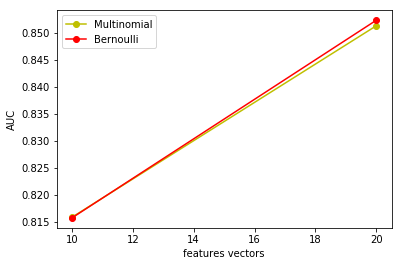

In [13]:
import matplotlib.pyplot as plt

multi = []
bernou = []
for num in range(10, 50, 10):
    s = Swinger()
    s.load('MultinomialNB', pos='pos.json', neg='neg.json', BestFeatureVec=num)
    multi.append(s.score(pos_test='pos.json', neg_test='neg.json'))
    
    s.load('BernoulliNB', pos='pos.json', neg='neg.json', BestFeatureVec=num)
    bernou.append(s.score(pos_test='pos.json', neg_test='neg.json'))

plt.plot(range(10, 50, 10), multi, 'o-', color="y",label="Multinomial")
plt.plot(range(10, 50, 10), bernou, 'o-', color="r",label="Bernoulli")
plt.legend(loc='best')
plt.xlabel("features vectors")
plt.ylabel("AUC")
plt.show()
    
    

In [ ]:
## 字典法的缺點

如果以前沒看過這個字  
就沒輒了

## 讓我們先建立一個語意模型吧 - word2vec

![img](https://www.extremetech.com/wp-content/uploads/2015/10/AI-640x353.jpg)

